In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

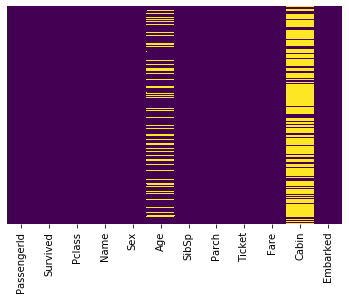

In [4]:
# Missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

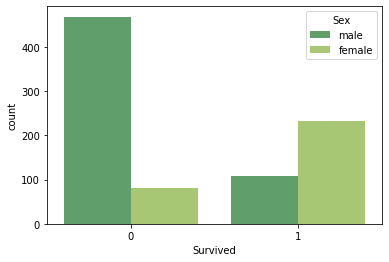

In [5]:
#count-plot of people survided 
sns.countplot(x='Survived', hue='Sex', data=df, palette='summer')

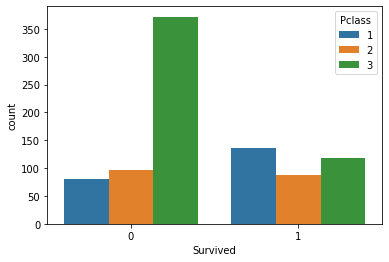

In [6]:
#no. of people who survived according to their Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=df)

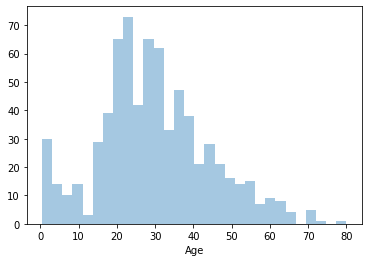

In [7]:
#distribution plot of age of the people
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

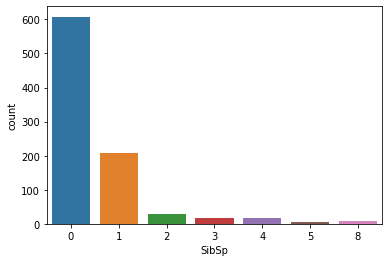

In [8]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp', data=df)

In [ ]:
#We have a lot of single people on board, they don’t have spouse or children.

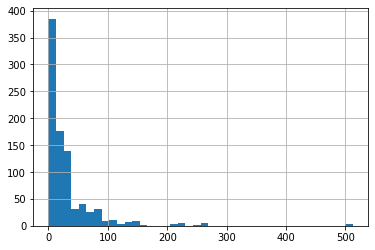

In [11]:
#distribution plot of the ticket fare
df['Fare'].hist(bins=40)

In [ ]:
#It looks like most of the purchase prices are between 0 and50, 
#which actually makes sense tickets are more distributed towards cheaper fare prices
#because most passengers are in cheaper third class.

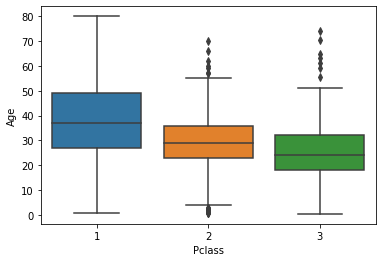

In [16]:
#Data Cleaning
#boxplot with age on y-axis and Passenger class on x-axis.
sns.boxplot(x='Pclass', y='Age', data=df)

In [17]:
# We’ll use these average age values to impute based on Pclass for Age.
def imput_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
df['Age'] = df[['Age', 'Pclass']].apply(imput_age, axis=1)

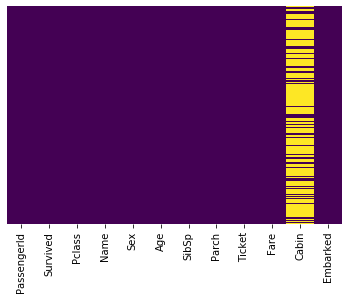

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
# Now let us go ahead and drop the Cabin column and the row in Embarked that is NaN.

df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Converting Categorical Features

In [22]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

embark = pd.get_dummies(df['Embarked'],drop_first=True)

df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

df = pd.concat([df,sex,embark],axis=1)

df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# Building a Logistic Regression model

In [24]:
from sklearn.model_selection import train_test_split
X_df, X_test, y_df, y_test = train_test_split(df.drop('Survived',axis=1), 
           df['Survived'], test_size=0.30, 
            random_state=101)

In [ ]:
# # Here y is the actual data which we are going to predict, 
# everything else is going to be the features(x).
# # Set the test size to 30 percent and you don’t actually have to set your random state
# but this is put so 
# if you want your result to match mines exactly.
# # We will use train_test_split from the cross_validation module to split our data. 
# 70%of the data will be training data and %30 will be testing data.

In [26]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_df, y_df)

/Users/gg8kyd/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

In [ ]:
# Model Evaluation
# We can check precision, recall,
# f1-score using classification report and also see how accurate is our model for 
# predictions:

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


In [ ]:
# From our confusion matrix we conclude that:
# True positive: 151(We predicted a positive result and it was positive)
# True negative: 68(We predicted a negative result and it was negative)
# False positive: 12(We predicted a positive result and it was negative)
# False negative: 36(We predicted a negative result and it was positive)

In [ ]:
# Accuracy = (TP+TN)/total
# Accuracy = (148+68)/267 ~ 81%
# Error Rate/misclassication rate = (FP+FN)/total
# Error rate = (36+15)/267 ~19%